In [2]:
import sys
sys.path.append('../scripts')  
from models import *
from df_handling import * 
from text_embedding import *
import pandas as pd
from sklearn.model_selection import train_test_split
from translation import *

In [27]:
df = pd.read_json('../data/politifact_factcheck_data.json', lines=True)

In [28]:
df = df[['verdict','statement']]
df['text_embedding'] = ''

In [29]:
#translate statement from english to greek with merged labels
df['statement'] = df['statement'].apply(lambda x: translate(x))

"Were you aware the $3.5 Trillion Human Infrastructure package includes an animal agriculture tax of $2,600‼️ per head of cattle? $500 for swine!!!"
Translation not possible: Translation API returned the input string unchanged.


In [30]:
#delete nulls
df = df.dropna().reset_index(drop=True)

In [31]:
create_text_embeddings(df, [2], ['text_embedding'])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [43]:
df.iloc[1,1]

TextBlob(""Ο Bennie Thompson ενεργά τις ταραχές με επικεφαλής τη δεκαετία του '90."")

In [33]:
mapping = {'false':0, 'true':1, 'half-true':2, 'mostly-false':0, 'mostly-true':1, 'pants-fire':0, }
df['verdict'] = df['verdict'].map(mapping)
df['verdict'].value_counts()

0    11759
1     5795
2     3597
Name: verdict, dtype: int64

In [34]:
df = df[(df.verdict==0) | (df.verdict==1) | (df.verdict==2)]
df.verdict.value_counts()

0    11759
1     5795
2     3597
Name: verdict, dtype: int64

In [46]:
df.verdict.value_counts()

0    11759
1     5795
2     3597
Name: verdict, dtype: int64

In [48]:
save_df(df, 'politifacts_merged_emb.csv', ['text_embedding'])

In [3]:
df = pd.read_csv('../data/politifacts_merged_emb.csv')
df= unravel_df(df,['text_embedding'])


In [4]:
df.verdict.value_counts()

0    11759
1     5795
2     3597
Name: verdict, dtype: int64

In [4]:
arr = [df.iloc[i,2] for i in range(len(df))]


X_train, X_test, y_train, y_test= train_test_split(arr  , np.array(df.iloc[:,0]).astype('int'), test_size=0.2, random_state=42)

Model Accuracy: 0.204

Model Recall: 0.204

Model Precision: 0.473

Model F1-Score: 0.117

Cross validation score: [0.189 0.193 0.196 0.193 0.18  0.189 0.183 0.192 0.185 0.182]

Classification report:
               precision    recall  f1-score   support

           0       0.56      0.06      0.11      2304
           1       0.50      0.00      0.01      1166
           2       0.18      0.94      0.30       761

    accuracy                           0.20      4231
   macro avg       0.41      0.34      0.14      4231
weighted avg       0.47      0.20      0.12      4231




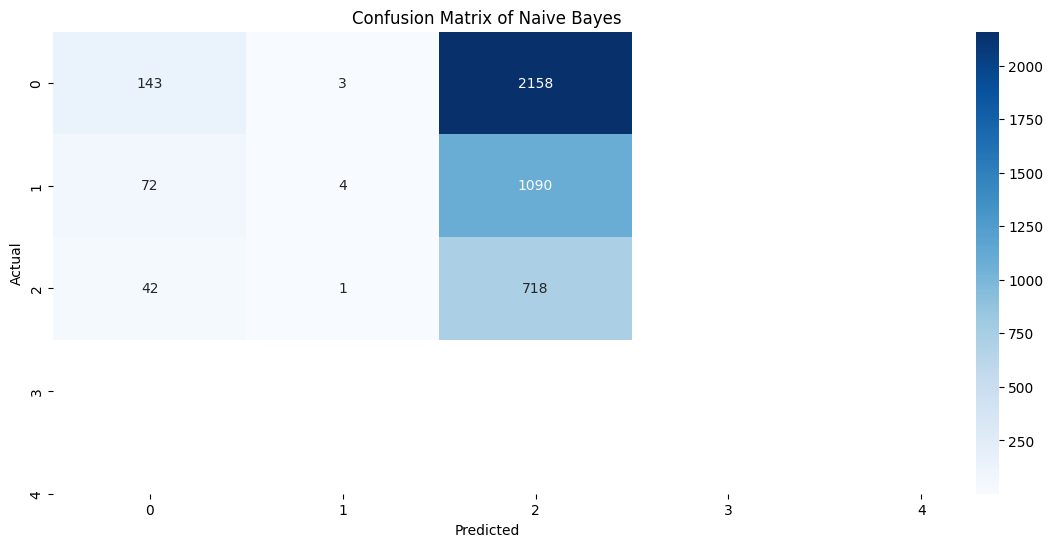

In [56]:
NaiveBayes(X_train, X_test, y_train, y_test)

Model Accuracy: 0.545

Model Recall: 0.545

Model Precision: 0.297

Model F1-Score: 0.384

Cross validation score: [0.559 0.559 0.559 0.559 0.559 0.559 0.559 0.559 0.559 0.559]

Classification report:
               precision    recall  f1-score   support

           0       0.54      1.00      0.71      2304
           1       0.00      0.00      0.00      1166
           2       0.00      0.00      0.00       761

    accuracy                           0.54      4231
   macro avg       0.18      0.33      0.24      4231
weighted avg       0.30      0.54      0.38      4231




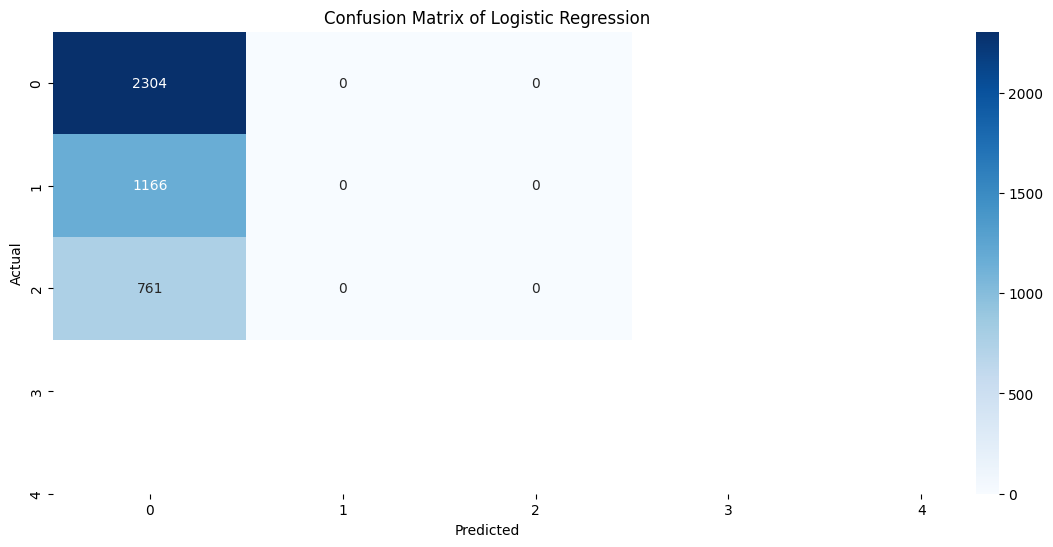

In [57]:
LogisticReg(X_train, X_test, y_train, y_test)

In [58]:
SVM(X_train, X_test, y_train, y_test)

  File "c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Model Accuracy: 0.205

Model Recall: 0.205

Model Precision: 0.402

Model F1-Score: 0.125

Cross validation score: [0.556 0.202 0.202 0.191 0.203 0.198 0.187 0.194 0.186 0.206]

Classification report:
               precision    recall  f1-score   support

           0       0.53      0.07      0.12      2304
           1       0.29      0.01      0.02      1166
           2       0.18      0.92      0.30       761

    accuracy                           0.21      4231
   macro avg       0.33      0.33      0.15      4231
weighted avg       0.40      0.21      0.13      4231




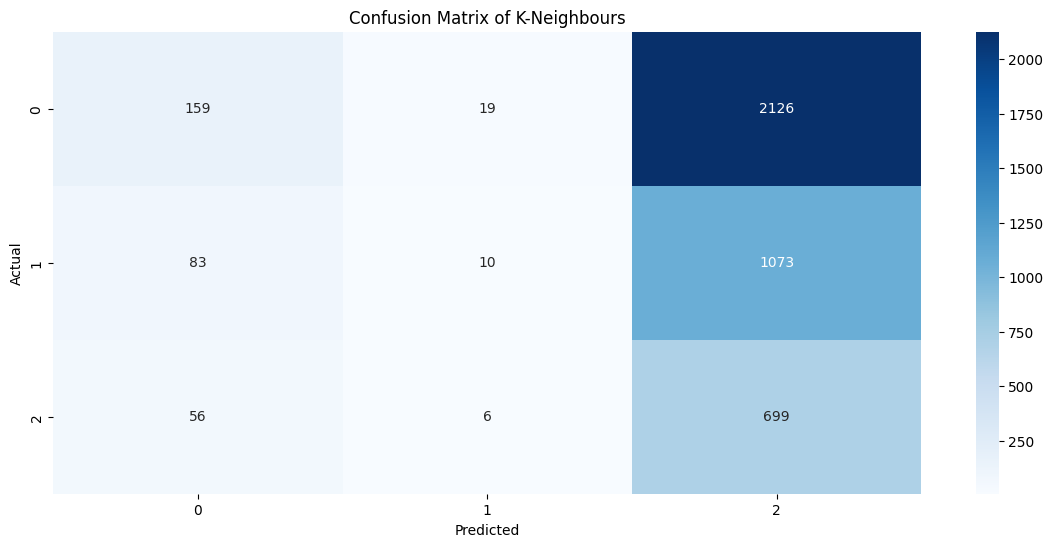

In [6]:
KNeigh(X_train, X_test, y_train, y_test)

Model Accuracy: 0.545

Model Recall: 0.545

Model Precision: 0.435

Model F1-Score: 0.385

Cross validation score: [0.559 0.558 0.557 0.56  0.559 0.558 0.559 0.559 0.559 0.557]

Classification report:
               precision    recall  f1-score   support

           0       0.54      1.00      0.71      2304
           1       0.50      0.00      0.01      1166
           2       0.00      0.00      0.00       761

    accuracy                           0.54      4231
   macro avg       0.35      0.33      0.24      4231
weighted avg       0.43      0.54      0.39      4231




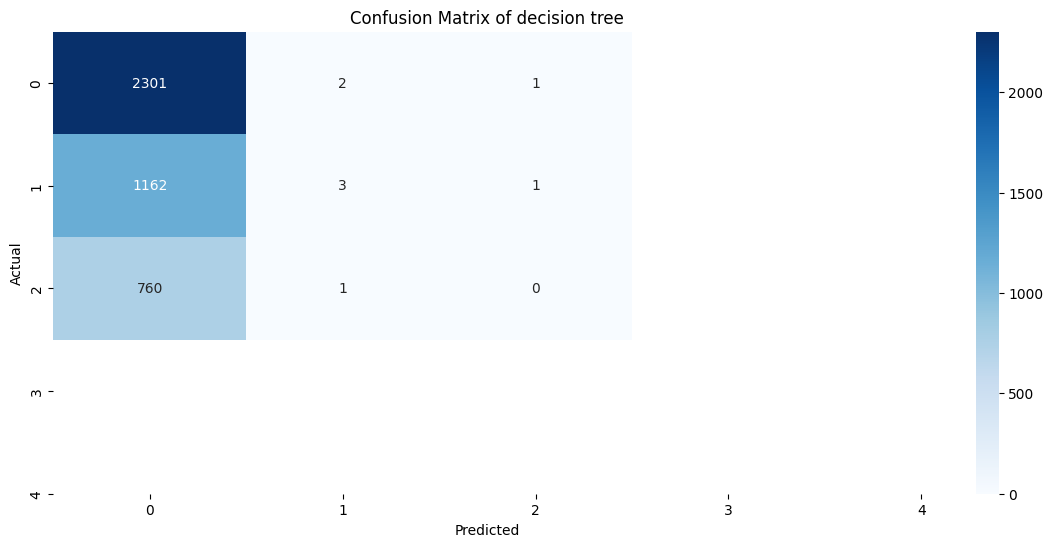

In [7]:
DecisionTree(X_train, X_test, y_train, y_test)

Model Accuracy: 0.545

Model Recall: 0.545

Model Precision: 0.434

Model F1-Score: 0.385

Cross validation score: [0.559 0.559 0.559 0.559 0.559 0.559 0.559 0.559 0.559 0.559]

Classification report:
               precision    recall  f1-score   support

           0       0.54      1.00      0.71      2304
           1       0.50      0.00      0.00      1166
           2       0.00      0.00      0.00       761

    accuracy                           0.54      4231
   macro avg       0.35      0.33      0.24      4231
weighted avg       0.43      0.54      0.38      4231




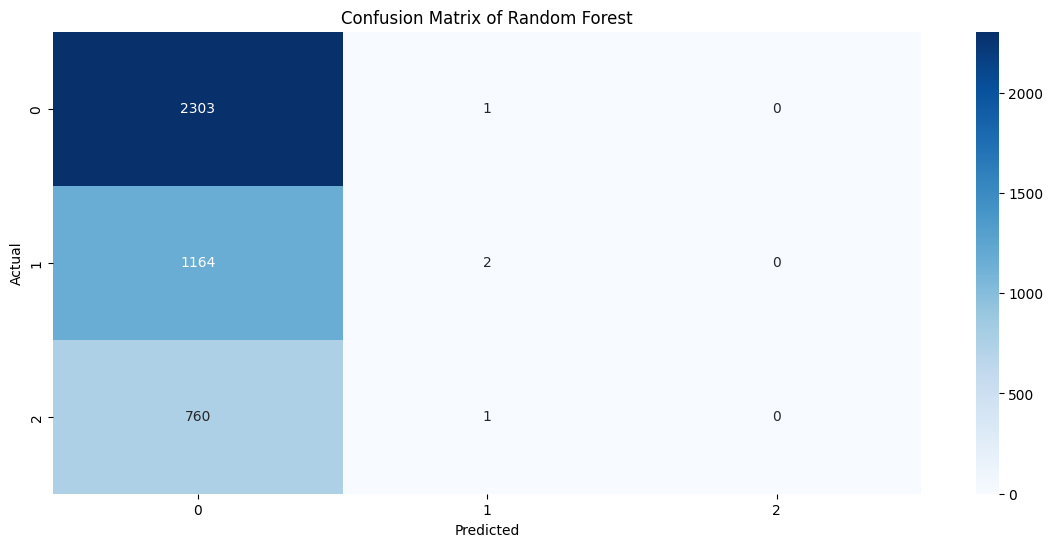

In [8]:
RandomForest(X_train, X_test, y_train, y_test)

Model Accuracy: 0.545

Model Recall: 0.545

Model Precision: 0.297

Model F1-Score: 0.384

Cross validation score: [0.559 0.559 0.559 0.559 0.559 0.559 0.559 0.559 0.559 0.559]

Classification report:
               precision    recall  f1-score   support

           0       0.54      1.00      0.71      2304
           1       0.00      0.00      0.00      1166
           2       0.00      0.00      0.00       761

    accuracy                           0.54      4231
   macro avg       0.18      0.33      0.24      4231
weighted avg       0.30      0.54      0.38      4231




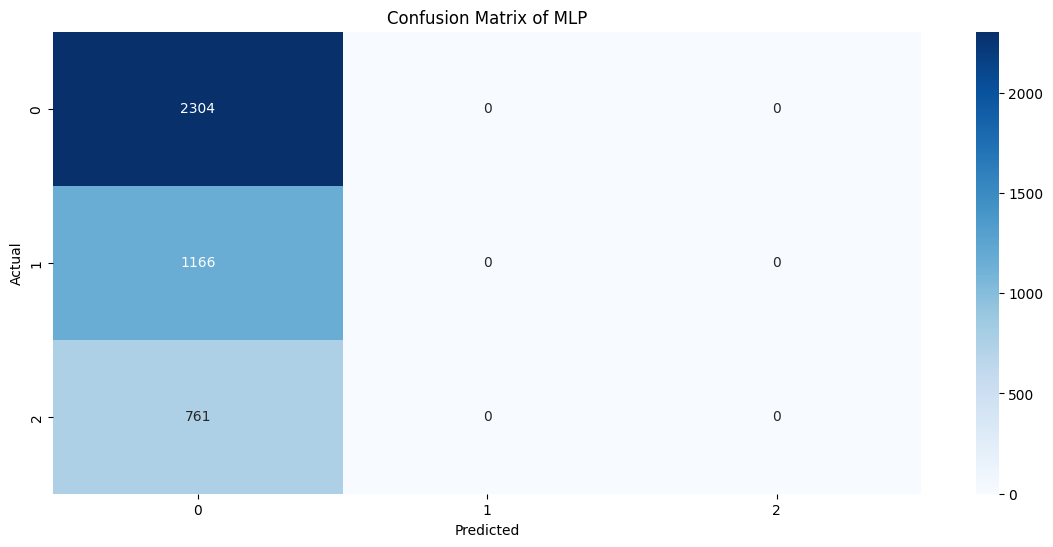

In [9]:
MLP(X_train, X_test, y_train, y_test)